# 군집화 (clustering)
- 주어진 데이터 집합을 유사한 데이터들의 수를 군집으로 그루핑하는 비지도 학습

In [ ]:
import numpy as np
import pandas as pd
SEED = 42

#군집화 목표
- 좋은 군집화란 동일한 군집에 속한 데이터들 서로 유사하게 그룹핑하는 것입니다. 
- 다른 의미로는 다른 군집에 속한 데이터들이 서로 다를수록 좋다는 뜻이 됩니다.

- 손글씨 데이터

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data/255
y = digits.target
x.shape, y.shape

((1797, 64), (1797,))

- 데이터 섞기

In [ ]:
np.random.seed(SEED)
idx = np.arange(x.shape[0])
np.random.shuffle(idx)
idx

array([1245,  220, 1518, ...,  860, 1459, 1126])

In [ ]:
x = x[idx]
y = y[idx]

# K-means
- k개의 랜덤한 중심점으로부터 가까운 데이터들을 묶는 군집화 기법
- 평균을 사용함에 따라 이상치에 민감
- 거리를 재기 때문에 스케일링 필수
- 초기 중심에 따라 결과가 상이함
- K-mean++
    - 초기 중심점 선정의 어려움을 해결하기 위한 방법
- 주요 파라미터
    - n_clusters : 군집수
    - init : 기본값이 k-means++

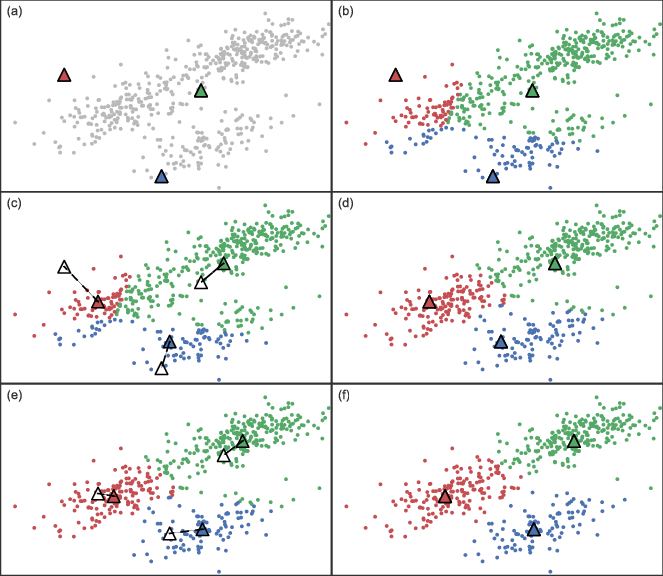

## K-means 군집화 알고리즘
- 구하고자 하는 군집의 수(K) 설정
- 초기 데이터의 분포 상태에서 K개의 중심점을 임의로 지정
- 각 데이터들로부터 K개의 각 중심점 까지의 거리를 계산
- 각 데이터들을 가장 가까운 중심점이 속한 군집에 할당
- K개의 중심점을 다시 계산하여 갱신 ( 중심점은 각 군집의 데이터들의 평균값)
- 중심점이 더 이상 변하지 않을 때까지 3, 4, 5 과정을 반복

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10,random_state=SEED)
kmeans.fit(x)

KMeans(n_clusters=10, random_state=42)

In [ ]:
kmeans.labels_.shape

(1797,)

In [ ]:
kmeans.predict(x)

array([4, 9, 1, ..., 3, 3, 2], dtype=int32)

# 대표적인 군집화 성능 평가지표

# 사전의 정의된 그룹이 있는 경우

- homogeneity
    - 각 군집(예측값)이 동일한 클래스(실제값)로 구성되어있는 정도

In [ ]:
from sklearn.metrics import homogeneity_score
homogeneity_score(y,kmeans.labels_)

0.7378058968326526

- completeness
    - 각 클래스(실제값)에 대하여 동일한 군집(예측값)으로 구성되어 있는 정도

In [ ]:
from sklearn.metrics import completeness_score
completeness_score(y,kmeans.labels_)

0.7458562193736206

- v-measure
    - homogeneity와 completeness 조화평균

In [ ]:
from sklearn.metrics import v_measure_score
v_measure_score(y,kmeans.labels_)

0.7418092176543222

## 사전의 정의된 그룹이 없는 경우
- silhouette coefficient (실루엣 계수)
    - 군집 내의 거리는 짧을수록, 군집간의 거리는 길수록 좋은 군집화임을 평가하기 위한 지표
    - -1 ~ 1의 값을 가진다.
        - 1에 가까울수록 명확하게 군집화됨을 의미
        - 0에 가까울수록 군집간의 거리가 가까워짐을 의미
        - 음수일경우 잘못된 방식으로 군집화임을 의미

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(x,kmeans.labels_)

0.18226446312670963

In [ ]:
def print_score(x,y,pred):
    print(f"homogeneity: {homogeneity_score(y,pred)}")
    print(f"completeness: {completeness_score(y,pred)}")
    print(f"v_measure: {v_measure_score(y,pred)}")
    print(f"silhouette: {silhouette_score(x,pred)}")

In [ ]:
print_score(x,y,kmeans.labels_)

homogeneity: 0.7378058968326526
completeness: 0.7458562193736206
v_measure: 0.7418092176543222
silhouette: 0.18226446312670963


- MiniBatchKMeans
    - mini-batch 개수만큼 무작위로 분리하여 K-means 군집화를 한다.
    - 속도가 훨씬 빠르다.

In [ ]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=10, random_state=SEED,batch_size=1024)
kmeans.fit(x)

MiniBatchKMeans(n_clusters=10, random_state=42)

In [ ]:
x.shape

(1797, 64)

In [ ]:
print_score(x,y,kmeans.labels_)

homogeneity: 0.7393725303097455
completeness: 0.7476405613768988
v_measure: 0.7434835600545253
silhouette: 0.18217243941718195


# Mean Shift
- K-means와 유사하게 중심을 이동하면서 군집화한다.
- 차이점은 평균 지점이 아닌, 데이터의 밀도가 가장 높은 지점을 중심으로 이동.
- 군집 개수를 지정할 수 없다.
- 중심점을 기준으로 일정 반경 내에 같은 군집으로 묶는다.
- 반경을 벗어나는 데이터 포인트들에 대해서는 묶지 않는다.
- 주요 파라미터
    - bandwidth : None or Flot
        - None일 경우에는 자동으로 반경을 추정
    - cluster_all : 모든 샘플 군집 부여 여부
        - True일 경우 모든 샘플에 강제로 군집 부여
        - False일 경우 반경 밖 샘플들은 -1 부여

In [ ]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=0.2, cluster_all=True, n_jobs=-1)
ms.fit(x)

MeanShift(bandwidth=0.2, n_jobs=-1)

In [ ]:
np.unique(ms.labels_)

array([0])

# DBSCAN
- 밀도 기반 클러스터링
- 데이터 샘플들이 몰려있는 지점을 찾아 묶어서 군집화
- 주요 파라미터
    - eps : 이웃으로 판단하는 최대거리
    - min_samples : 이웃 반경내 최소 샘플수

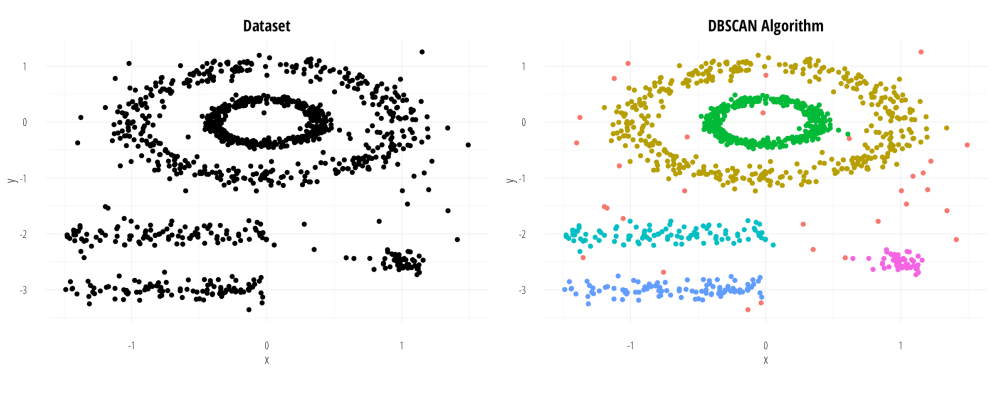

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(min_samples = 3, eps = 0.05, n_jobs=-1)
dbscan.fit(x)

DBSCAN(eps=0.05, min_samples=3, n_jobs=-1)

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24])

# OPTICS
- DBSCAN과 유사
    - DBSCAN보다 빠르게 처리
- 주요 파라미터
    - eps : 이웃으로 판단하는 최대거리
    - min_samples : 이웃 반경내 최소 샘플수

In [ ]:
from sklearn.cluster import OPTICS
optics = OPTICS(max_eps = 0.05, min_samples=3, n_jobs=-1)
optics.fit(x)

OPTICS(max_eps=0.05, min_samples=3, n_jobs=-1)

In [ ]:
np.unique(optics.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19])

# AgglomerativeClustering

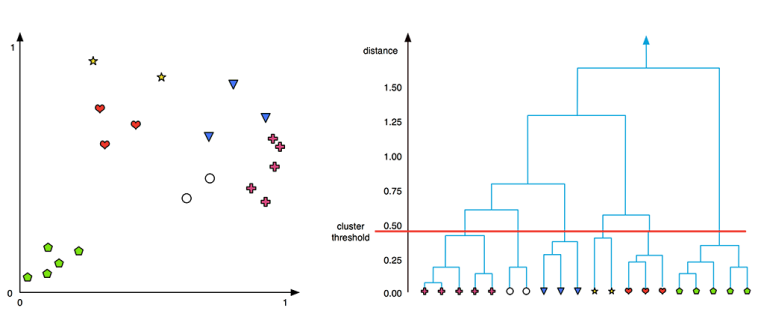

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=10)
ac.fit(x)

AgglomerativeClustering(n_clusters=10)

In [ ]:
print_score(x,y,ac.labels_)

homogeneity: 0.8575128719504723
completeness: 0.8790955851724198
v_measure: 0.8681701126909083
silhouette: 0.17849659940596496
